# Limpieza y Exploración Inicial: 
## Tabla `common_player_info`

En este notebook trabajaremos con la tabla **common_player_info.csv**, que contiene información biográfica y antropométrica de los jugadores NBA.  

Objetivos:  
1. Revisar estructura y calidad de datos.  
2. Realizar limpieza básica (nombres, fechas, unidades).  
3. Estandarizar banderas y valores faltantes.  
4. Exportar un dataset limpio para futuros análisis.  



In [7]:
# Librerías principales
import numpy as np
import pandas as pd
from datetime import datetime


##  Carga de archivo

Los datasets se encuentran en la carpeta `data/`.  
Se cargan uno a uno en distintos DataFrames para analizarlos por separado.


In [8]:
df_info = pd.read_csv(r"C:\Users\elian\OneDrive\Escritorio\NBA_ComposicionCorporal_Rendimiento\data\common_player_info.csv")

# Vista inicial
print("Dimensiones:", df_info.shape)
df_info.head()




Dimensiones: (4171, 33)


,person_id,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,...,playercode,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,HISTADD_alaa_abdelnaby,1990.0,1994.0,N,Y,Y,1990,1,25,N
1,76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",K. Abdul-Jabbar,kareem-abdul-jabbar,1947-04-16 00:00:00,UCLA,USA,...,HISTADD_kareem_abdul-jabbar,1969.0,1988.0,N,Y,Y,1969,1,1,Y
2,1505,Tariq,Abdul-Wahad,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",T. Abdul-Wahad,tariq-abdul-wahad,1974-11-03 00:00:00,San Jose State,France,...,tariq_abdul-wahad,1997.0,2003.0,N,Y,Y,1997,1,11,N
3,949,Shareef,Abdur-Rahim,Shareef Abdur-Rahim,"Abdur-Rahim, Shareef",S. Abdur-Rahim,shareef-abdur-rahim,1976-12-11 00:00:00,California,USA,...,shareef_abdur-rahim,1996.0,2007.0,N,Y,Y,1996,1,3,N
4,76005,Tom,Abernethy,Tom Abernethy,"Abernethy, Tom",T. Abernethy,tom-abernethy,1954-05-06 00:00:00,Indiana,USA,...,HISTADD_tom_abernethy,1976.0,1980.0,N,Y,Y,1976,3,43,N


In [9]:
# Tipos de datos y valores nulos
print("Información general del dataset:")
df_info.info()

print("\Valores nulos por columna:")
print(df_info.isnull().sum().sort_values(ascending=False))



<>:5: SyntaxWarning: invalid escape sequence '\V'
<>:5: SyntaxWarning: invalid escape sequence '\V'
C:\Users\elian\AppData\Local\Temp\ipykernel_476\3720121796.py:5: SyntaxWarning: invalid escape sequence '\V'
  print("\Valores nulos por columna:")


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4171 entries, 0 to 4170
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   person_id                         4171 non-null   int64  
 1   first_name                        4171 non-null   object 
 2   last_name                         4171 non-null   object 
 3   display_first_last                4171 non-null   object 
 4   display_last_comma_first          4171 non-null   object 
 5   display_fi_last                   4171 non-null   object 
 6   player_slug                       4171 non-null   object 
 7   birthdate                         4171 non-null   object 
 8   school                            4156 non-null   object 
 9   country                           4170 non-null   object 
 10  last_affiliation                  4171 non-null   object 
 11  height                            40

In [10]:
# Resumen estadístico inicial
print("Resumen de variables numéricas:")
print(df_info.describe())

print("\nResumen de variables categóricas:")
print(df_info.describe(include="object").T)


Resumen de variables numéricas:
          person_id       weight   season_exp       team_id    from_year  \
count  4.171000e+03  4071.000000  4171.000000  4.171000e+03  4156.000000   
mean   3.327509e+05   211.133382     5.195157  1.339538e+09  1989.303176   
std    5.768886e+05    26.926082     4.470879  6.026618e+08    22.812298   
min    2.000000e+00   133.000000     0.000000  0.000000e+00  1946.000000   
25%    7.612850e+04   190.000000     2.000000  1.610613e+09  1974.000000   
50%    7.759300e+04   210.000000     3.000000  1.610613e+09  1992.000000   
75%    2.022745e+05   230.000000     8.000000  1.610613e+09  2010.000000   
max    1.631347e+06   360.000000    22.000000  1.610613e+09  2022.000000   

           to_year  
count  4156.000000  
mean   1993.746631  
std      23.636712  
min    1946.000000  
25%    1977.000000  
50%    1998.000000  
75%    2015.000000  
max    2023.000000  

Resumen de variables categóricas:
                                 count unique              

## Resumen estadístico inicial – Common Player Info
### Variables numéricas

Peso: media ~211 lb (96 kg), rango 133–360 lb.

Años de experiencia (season_exp): media ~5, máximo 22 temporadas.

from_year / to_year: cubre desde 1946 hasta 2023, consistente con la historia de la NBA.

team_id: incluye valores en cero → indica jugadores sin equipo asignado.

### Variables categóricas

Nombres: alta dispersión, con repeticiones (ej. George Johnson, Williams).

País: 73 categorías, pero mayoría concentrada en USA (3770 registros).

Altura: 27 categorías en formato ft-in (ej. "6-7"), a unificar a metros.

Posición: 7 categorías, predominan Guards.

Draft: incluye "Undrafted", válido como categoría.

Banderas (nba_flag, dleague_flag, etc.): están en "Y/N".

Jersey: 106 valores distintos, con 12 como el más común.


## Detección y eliminación de duplicados 

In [11]:
# Buscar duplicados en person_id (columna original en el crudo)
duplicados = df_info[df_info["person_id"].duplicated(keep=False)]
print("Cantidad de duplicados encontrados:", len(duplicados))

# Mostrar ejemplos si existen
if not duplicados.empty:
    print("\nEjemplos de duplicados encontrados:")
    print(duplicados.head())

# Eliminar duplicados manteniendo el primero
df_info = df_info.drop_duplicates(subset="person_id", keep="first").copy()

print("Dimensiones tras eliminar duplicados:", df_info.shape)





Cantidad de duplicados encontrados: 0
Dimensiones tras eliminar duplicados: (4171, 33)


## Conversion de fechas 

In [12]:
from datetime import datetime

# Convertir birthdate a datetime
df_info["birthdate"] = pd.to_datetime(df_info["birthdate"], errors="coerce")

# Edad actual
today = datetime.today()
df_info["age"] = df_info["birthdate"].apply(
    lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day))
    if pd.notnull(x) else np.nan
).astype("Int64")

# Edad al debut y última temporada
df_info["age_at_debut"] = (df_info["from_year"] - df_info["birthdate"].dt.year).round().astype("Int64")
df_info["age_at_last_season"] = (df_info["to_year"] - df_info["birthdate"].dt.year).round().astype("Int64")

# Validación rápida
print("Edad al debut:", df_info["age_at_debut"].describe())
print("Edad en última temporada:", df_info["age_at_last_season"].describe())




Edad al debut: count      4156.0
mean     22.94129
std       2.68219
min           8.0
25%          22.0
50%          23.0
75%          24.0
max          80.0
Name: age_at_debut, dtype: Float64
Edad en última temporada: count       4156.0
mean     27.384745
std       4.698972
min           18.0
25%           24.0
50%           26.0
75%           30.0
max           93.0
Name: age_at_last_season, dtype: Float64


## Detección y limpieza final de outliers en edades
### Hallazgos

Debut mínimo = 8 años → imposible (jugador demasiado joven).

Retiro máximo = 79 años → tampoco es realista para la NBA.

Decisiones

Marcar como NaN los valores de debut menores a 17 años o mayores a 40.

Marcar como NaN los valores de retiro menores a 17 años o mayores a 50.

Dejar la edad actual sin tocar, porque puede variar según cálculos de birthdate.

In [13]:
# Corrección de outliers en debut y retiro
df_info.loc[(df_info["age_at_debut"] < 17) | (df_info["age_at_debut"] > 40), "age_at_debut"] = np.nan
df_info.loc[(df_info["age_at_last_season"] < 17) | (df_info["age_at_last_season"] > 50), "age_at_last_season"] = np.nan

# Validación posterior
print("Edad al debut:", df_info["age_at_debut"].describe())
print("\nEdad en última temporada:", df_info["age_at_last_season"].describe())


Edad al debut: count       4139.0
mean     22.852863
std       2.154575
min           18.0
25%           22.0
50%           23.0
75%           24.0
max           36.0
Name: age_at_debut, dtype: Float64

Edad en última temporada: count      4153.0
mean     27.35059
std      4.502289
min          18.0
25%          24.0
50%          26.0
75%          30.0
max          50.0
Name: age_at_last_season, dtype: Float64


In [14]:
# Revisar columnas actuales y cuántos valores nulos tienen
print("Número total de columnas:", len(df_info.columns))
print("\nListado de columnas disponibles:\n", df_info.columns.tolist())

print("\nValores nulos por columna:")
print(df_info.isnull().sum())


Número total de columnas: 36

Listado de columnas disponibles:
 ['person_id', 'first_name', 'last_name', 'display_first_last', 'display_last_comma_first', 'display_fi_last', 'player_slug', 'birthdate', 'school', 'country', 'last_affiliation', 'height', 'weight', 'season_exp', 'jersey', 'position', 'rosterstatus', 'games_played_current_season_flag', 'team_id', 'team_name', 'team_abbreviation', 'team_code', 'team_city', 'playercode', 'from_year', 'to_year', 'dleague_flag', 'nba_flag', 'games_played_flag', 'draft_year', 'draft_round', 'draft_number', 'greatest_75_flag', 'age', 'age_at_debut', 'age_at_last_season']

Valores nulos por columna:
person_id                             0
first_name                            0
last_name                             0
display_first_last                    0
display_last_comma_first              0
display_fi_last                       0
player_slug                           0
birthdate                             0
school                           

##  Conversión de unides físicas

In [15]:
# Conversión altura (pies-pulgadas → metros, redondeado a 2 decimales)
df_info[["feet", "inches"]] = df_info["height"].str.split("-", expand=True)
df_info["height_m"] = ((pd.to_numeric(df_info["feet"], errors="coerce") * 30.48) + 
                       (pd.to_numeric(df_info["inches"], errors="coerce") * 2.54)) / 100
df_info["height_m"] = df_info["height_m"].round(2)
df_info = df_info.drop(columns=["feet", "inches"])

# Conversión peso (libras → kilogramos, redondeado a 1 decimal)
df_info["weight_kg"] = (df_info["weight"] * 0.453592).round(1)

# IMC
df_info["BMI"] = (df_info["weight_kg"] / (df_info["height_m"] ** 2)).round(1)

# Vista rápida
df_info[["height", "height_m", "weight", "weight_kg", "BMI"]].head(10)


,height,height_m,weight,weight_kg,BMI
0,6-10,2.08,240.0,108.9,25.2
1,7-2,2.18,225.0,102.1,21.5
2,6-6,1.98,235.0,106.6,27.2
3,6-9,2.06,245.0,111.1,26.2
4,6-7,2.01,220.0,99.8,24.7
5,6-3,1.90,180.0,81.6,22.6
6,6-3,1.90,195.0,88.5,24.5
7,6-6,1.98,200.0,90.7,23.1
8,6-8,2.03,225.0,102.1,24.8
9,6-5,1.96,185.0,83.9,21.8


## Validación de Peso en Kilogramos

Tras la conversión de libras a kilogramos se revisaron valores extremos.  
Se consideró como rango aceptable 60–160 kg para atletas profesionales.  

Los registros fuera de este rango se listaron como outliers para posterior análisis.


In [16]:
# Detectar pesos fuera de rango (fuera de 60–160 kg)
outliers_weight = df_info[(df_info["weight_kg"] < 60) | (df_info["weight_kg"] > 160)]

print("Jugadores con peso fuera de rango:\n")
print(outliers_weight[["person_id", "display_first_last", "weight", "weight_kg", "team_name"]])


Jugadores con peso fuera de rango:

     person_id display_first_last  weight  weight_kg team_name
284     204021        Sim Bhullar   360.0      163.3       NaN


## Validación de IMC (BMI)

El IMC se validó usando un rango de referencia entre 18 y 35, que cubre desde bajo peso hasta obesidad grado I.  
Valores fuera de este rango se consideran outliers y se listaron para revisión, sin eliminarlos automáticamente.


In [17]:
# Detectar outliers de IMC (fuera de 18–35)
outliers_bmi = df_info[(df_info["BMI"] < 18) | (df_info["BMI"] > 35)]

print("Jugadores con IMC fuera de rango:\n")
print(outliers_bmi[["person_id", "display_first_last", "height_m", "weight_kg", "BMI"]])


Jugadores con IMC fuera de rango:

     person_id display_first_last  height_m  weight_kg   BMI
343      76195         Manute Bol      2.29       90.7  17.3


## Estimación de Masa Grasa y Masa Magra en common_player_info

Para estimar la composición corporal, utilizamos la fórmula propuesta por Deurenberg (1991):

#### 𝐵𝐹%=1.20×𝐼𝑀𝐶+0.23×𝑒𝑑𝑎𝑑−10.8×𝑠𝑒𝑥𝑜−5.4


sexo = 1 para hombres 

edad = ya calculada en la columna age.

IMC = ya disponible en la columna BMI.

### Variables derivadas

#### Masa Grasa (FM):

### 𝐹𝑀=𝑃𝑒𝑠𝑜(𝑘𝑔)×𝐵𝐹%100


#### Masa Libre de Grasa (FFM):

### 𝐹𝐹𝑀=𝑃𝑒𝑠𝑜(𝑘𝑔)−𝐹𝑀


In [18]:
# Fórmula de Deurenberg para % grasa corporal
df_info["body_fat_pct_est"] = (
    1.20 * df_info["BMI"] + 0.23 * df_info["age"] - 10.8 * 1 - 5.4
).round(1)

# Masa grasa (kg)
df_info["fat_mass_kg"] = (df_info["weight_kg"] * df_info["body_fat_pct_est"] / 100).round(1)

# Masa libre de grasa (kg)
df_info["lean_mass_kg"] = (df_info["weight_kg"] - df_info["fat_mass_kg"]).round(1)

# Validación rápida
print(df_info[["display_first_last", "weight_kg", "BMI", "age", 
               "body_fat_pct_est", "fat_mass_kg", "lean_mass_kg"]].head(10))


    display_first_last  weight_kg   BMI  age  body_fat_pct_est  fat_mass_kg  \
0       Alaa Abdelnaby      108.9  25.2   57              27.2         29.6   
1  Kareem Abdul-Jabbar      102.1  21.5   78              27.5         28.1   
2    Tariq Abdul-Wahad      106.6  27.2   50              27.9         29.7   
3  Shareef Abdur-Rahim      111.1  26.2   48              26.3         29.2   
4        Tom Abernethy       99.8  24.7   71              29.8         29.7   
5          Forest Able       81.6  22.6   93              32.3         26.4   
6       John Abramovic       88.5  24.5  106              37.6         33.3   
7         Alex Abrines       90.7  23.1   32              18.9         17.1   
8     Precious Achiuwa      102.1  24.8   25              19.3         19.7   
9           Alex Acker       83.9  21.8   42              19.6         16.4   

   lean_mass_kg  
0          79.3  
1          74.0  
2          76.9  
3          81.9  
4          70.1  
5          55.2  
6   

## Recalcular % de grasa usando age_at_last_season
1. Fórmula de Deurenberg ajustada

Body Fat % 
= 1.20 × BMI + 0.23 × Edad − 16.2

Ahora, la Edad será age_at_last_season en lugar de age.

In [19]:
# Recalcular body fat usando edad al retiro
df_info["body_fat_pct_est"] = (
    1.20 * df_info["BMI"] + 0.23 * df_info["age_at_last_season"] - 16.2
).round(1)

# Masa grasa (kg)
df_info["fat_mass_kg"] = (
    (df_info["body_fat_pct_est"] / 100) * df_info["weight_kg"]
).round(1)

# Masa magra (kg)
df_info["lean_mass_kg"] = (
    df_info["weight_kg"] - df_info["fat_mass_kg"]
).round(1)

# Vista de los primeros registros
df_info[
    ["display_first_last", "weight_kg", "BMI", "age_at_last_season",
     "body_fat_pct_est", "fat_mass_kg", "lean_mass_kg"]
].head(10)


,display_first_last,weight_kg,BMI,age_at_last_season,body_fat_pct_est,fat_mass_kg,lean_mass_kg
0,Alaa Abdelnaby,108.9,25.2,26,20.0,21.8,87.1
1,Kareem Abdul-Jabbar,102.1,21.5,41,19.0,19.4,82.7
2,Tariq Abdul-Wahad,106.6,27.2,29,23.1,24.6,82.0
3,Shareef Abdur-Rahim,111.1,26.2,31,22.4,24.9,86.2
4,Tom Abernethy,99.8,24.7,26,19.4,19.4,80.4
5,Forest Able,81.6,22.6,24,16.4,13.4,68.2
6,John Abramovic,88.5,24.5,28,19.6,17.3,71.2
7,Alex Abrines,90.7,23.1,25,17.3,15.7,75.0
8,Precious Achiuwa,102.1,24.8,24,19.1,19.5,82.6
9,Alex Acker,83.9,21.8,25,15.7,13.2,70.7


In [20]:
print(df_info.columns.tolist())


['person_id', 'first_name', 'last_name', 'display_first_last', 'display_last_comma_first', 'display_fi_last', 'player_slug', 'birthdate', 'school', 'country', 'last_affiliation', 'height', 'weight', 'season_exp', 'jersey', 'position', 'rosterstatus', 'games_played_current_season_flag', 'team_id', 'team_name', 'team_abbreviation', 'team_code', 'team_city', 'playercode', 'from_year', 'to_year', 'dleague_flag', 'nba_flag', 'games_played_flag', 'draft_year', 'draft_round', 'draft_number', 'greatest_75_flag', 'age', 'age_at_debut', 'age_at_last_season', 'height_m', 'weight_kg', 'BMI', 'body_fat_pct_est', 'fat_mass_kg', 'lean_mass_kg']


Se añadieron tres nuevas columnas: `body_fat_pct_est`, `fat_mass_kg`, `lean_mass_kg`.

In [21]:
cols_compare = [
    "display_first_last", "weight_kg", "BMI", "age",
    "body_fat_pct_est", "fat_mass_kg", "lean_mass_kg"
]

print(df_info[cols_compare].head(10))



    display_first_last  weight_kg   BMI  age  body_fat_pct_est  fat_mass_kg  \
0       Alaa Abdelnaby      108.9  25.2   57              20.0         21.8   
1  Kareem Abdul-Jabbar      102.1  21.5   78              19.0         19.4   
2    Tariq Abdul-Wahad      106.6  27.2   50              23.1         24.6   
3  Shareef Abdur-Rahim      111.1  26.2   48              22.4         24.9   
4        Tom Abernethy       99.8  24.7   71              19.4         19.4   
5          Forest Able       81.6  22.6   93              16.4         13.4   
6       John Abramovic       88.5  24.5  106              19.6         17.3   
7         Alex Abrines       90.7  23.1   32              17.3         15.7   
8     Precious Achiuwa      102.1  24.8   25              19.1         19.5   
9           Alex Acker       83.9  21.8   42              15.7         13.2   

   lean_mass_kg  
0          87.1  
1          82.7  
2          82.0  
3          86.2  
4          80.4  
5          68.2  
6   

## Validación de nuevas variables derivadas

Se validaron las nuevas métricas de composición corporal para evitar valores fuera de lo fisiológicamente posible:

- % de grasa corporal (`body_fat_pct_est`): rango esperado entre 5% y 30%.  
- Masa grasa (`fat_mass_kg`): debe estar entre 5 kg y 60 kg.  
- Masa libre de grasa (`lean_mass_kg`): debe ser positiva y menor que el peso corporal total.


In [22]:
# Outliers en % de grasa corporal
outliers_bfp = df_info[(df_info["body_fat_pct_est"] < 5) | (df_info["body_fat_pct_est"] > 30)]

print("Outliers en % de grasa corporal:\n")
print(outliers_bfp[["display_first_last", "weight_kg", "BMI", "age", "body_fat_pct_est"]])

# Outliers en masa grasa (kg)
outliers_fm = df_info[(df_info["fat_mass_kg"] < 5) | (df_info["fat_mass_kg"] > 60)]

print("\nOutliers en masa grasa (kg):\n")
print(outliers_fm[["display_first_last", "weight_kg", "fat_mass_kg", "body_fat_pct_est"]])

# Outliers en masa libre de grasa (kg)
outliers_ffm = df_info[df_info["lean_mass_kg"] <= 0]

print("\nOutliers en masa libre de grasa (kg):\n")
print(outliers_ffm[["display_first_last", "weight_kg", "fat_mass_kg", "lean_mass_kg"]])


Outliers en % de grasa corporal:

     display_first_last  weight_kg   BMI  age  body_fat_pct_est
2550      Oliver Miller      142.9  33.7   55              31.8
2776   Shaquille O'Neal      147.4  31.6   53              30.5

Outliers en masa grasa (kg):

Empty DataFrame
Columns: [display_first_last, weight_kg, fat_mass_kg, body_fat_pct_est]
Index: []

Outliers en masa libre de grasa (kg):

Empty DataFrame
Columns: [display_first_last, weight_kg, fat_mass_kg, lean_mass_kg]
Index: []


## Validación de composición corporal

- Solo se detectó un caso con % de grasa corporal ligeramente superior al umbral teórico (Oliver Miller, 30.3%).  
- Los valores de masa grasa y masa libre de grasa no presentaron outliers.  
- Se decidió conservar estos registros, ya que representan situaciones plausibles en jugadores con contextos particulares.


## Normalización de nombres de jugadores

Los nombres de los jugadores (display_first_last) presentan inconsistencias:

Guiones (-) en apellidos compuestos.

Espacios dobles o residuales.

Diferencias de mayúsculas/minúsculas.

Posibles caracteres especiales.

Para garantizar uniformidad en merges y análisis, se crea una nueva columna player_name_clean con el siguiente formato:

Sin guiones (reemplazados por espacio).

Sin espacios múltiples o sobrantes.

Estandarización en formato "Nombre Apellido" (title case).

In [23]:
# Crear columna de nombres normalizados
df_info["player_name_clean"] = (
    df_info["display_first_last"]
    .str.replace("-", " ", regex=False)       # quitar guiones
    .str.replace(r"\s+", " ", regex=True)     # quitar espacios dobles
    .str.strip()                              # quitar espacios extra
    .str.title()                              # formato "Nombre Apellido"
)

# Validación rápida: primeras filas
df_info[["display_first_last", "player_name_clean"]].head(15)



,display_first_last,player_name_clean
0,Alaa Abdelnaby,Alaa Abdelnaby
1,Kareem Abdul-Jabbar,Kareem Abdul Jabbar
2,Tariq Abdul-Wahad,Tariq Abdul Wahad
3,Shareef Abdur-Rahim,Shareef Abdur Rahim
4,Tom Abernethy,Tom Abernethy
5,Forest Able,Forest Able
6,John Abramovic,John Abramovic
7,Alex Abrines,Alex Abrines
8,Precious Achiuwa,Precious Achiuwa
9,Alex Acker,Alex Acker


In [24]:
# Contar cuántos nombres normalizados se repiten
duplicates_names = (
    df_info["player_name_clean"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "player_name_clean", "player_name_clean": "freq"})
)

# Aseguramos que freq sea numérico
duplicates_names["freq"] = pd.to_numeric(duplicates_names["freq"], errors="coerce")

# Filtrar solo los que aparecen más de una vez
duplicates_names = duplicates_names[duplicates_names["freq"] > 1]

print("Cantidad de nombres duplicados tras la normalización:", len(duplicates_names))
print(duplicates_names.head(20))





Cantidad de nombres duplicados tras la normalización: 0
Empty DataFrame
Columns: [freq, count]
Index: []


## Normalización de posiciones de juego

Problema:

La columna position trae abreviaturas (PG, SG, SF, PF, C) y combinaciones (SG-PG, SF-PF, etc.).

Si lo dejamos así, puede generar ruido en el análisis porque un mismo jugador puede figurar con formatos distintos.

Decisión tomada:

Creamos dos columnas:

main_position: la primera posición en caso de combinadas.

all_positions: manteniendo todas las posiciones en lista, para no perder información.

In [25]:
# Crear columnas de posiciones normalizadas
df_info["all_positions"] = df_info["position"].str.split("-")

# Tomar la primera posición como "principal"
df_info["main_position"] = df_info["all_positions"].apply(lambda x: x[0] if isinstance(x, list) else x)

# Validación rápida
print(df_info[["display_first_last", "position", "all_positions", "main_position"]].head(15))


     display_first_last       position     all_positions main_position
0        Alaa Abdelnaby        Forward         [Forward]       Forward
1   Kareem Abdul-Jabbar         Center          [Center]        Center
2     Tariq Abdul-Wahad  Forward-Guard  [Forward, Guard]       Forward
3   Shareef Abdur-Rahim        Forward         [Forward]       Forward
4         Tom Abernethy        Forward         [Forward]       Forward
5           Forest Able          Guard           [Guard]         Guard
6        John Abramovic        Forward         [Forward]       Forward
7          Alex Abrines          Guard           [Guard]         Guard
8      Precious Achiuwa        Forward         [Forward]       Forward
9            Alex Acker          Guard           [Guard]         Guard
10      Donald Ackerman          Guard           [Guard]         Guard
11           Mark Acres         Center          [Center]        Center
12        Charles Acton        Forward         [Forward]       Forward
13    

## Normalización de columnas tipo bandera

Las variables categóricas binarias (nba_flag, dleague_flag, games_played_flag, greatest_75_flag) vienen codificadas como "Y" y "N".
Para facilitar análisis y filtrado, se convierten a valores booleanos (True/False).

In [26]:
# Identificar columnas con banderas
flag_cols = ["nba_flag", "dleague_flag", "games_played_flag", "greatest_75_flag"]

# Convertir Y/N → booleano
for col in flag_cols:
    df_info[col] = df_info[col].map({"Y": True, "N": False})

# Validación rápida
print(df_info[flag_cols].head(10))
print("\nValores únicos por columna:")
for col in flag_cols:
    print(col, df_info[col].unique())


   nba_flag  dleague_flag  games_played_flag  greatest_75_flag
0      True         False               True             False
1      True         False               True              True
2      True         False               True             False
3      True         False               True             False
4      True         False               True             False
5      True         False               True             False
6      True         False               True             False
7      True         False               True             False
8      True         False               True             False
9      True          True               True             False

Valores únicos por columna:
nba_flag [ True False]
dleague_flag [False  True]
games_played_flag [ True False]
greatest_75_flag [False  True]


## Eliminación de columnas redundantes

En esta etapa removemos columnas que ya están representadas en otras variables más limpias o convertidas:  

- `first_name`, `last_name`, `display_first_last`, `display_last_comma_first`, `display_fi_last`  
  → reemplazadas por `player_name_clean`.  

- `height`, `weight`  
  → ya convertidas a métricas (`height_m`, `weight_kg`).  

Esto permite mantener un dataset más ordenado y sin duplicación de información.


In [27]:
print("Columnas actuales en df_info:")
print(df_info.columns.tolist())


Columnas actuales en df_info:
['person_id', 'first_name', 'last_name', 'display_first_last', 'display_last_comma_first', 'display_fi_last', 'player_slug', 'birthdate', 'school', 'country', 'last_affiliation', 'height', 'weight', 'season_exp', 'jersey', 'position', 'rosterstatus', 'games_played_current_season_flag', 'team_id', 'team_name', 'team_abbreviation', 'team_code', 'team_city', 'playercode', 'from_year', 'to_year', 'dleague_flag', 'nba_flag', 'games_played_flag', 'draft_year', 'draft_round', 'draft_number', 'greatest_75_flag', 'age', 'age_at_debut', 'age_at_last_season', 'height_m', 'weight_kg', 'BMI', 'body_fat_pct_est', 'fat_mass_kg', 'lean_mass_kg', 'player_name_clean', 'all_positions', 'main_position']


In [29]:
# Eliminar columnas redundantes
cols_drop = [
    "first_name", "last_name", "display_first_last",
    "display_last_comma_first", "display_fi_last",
    "height", "player_slug", "weight"
]

df_info = df_info.drop(columns=cols_drop, errors="ignore").copy()

print("Dimensiones después de eliminar columnas redundantes:", df_info.shape)
df_info.head()



Dimensiones después de eliminar columnas redundantes: (4171, 37)


,person_id,birthdate,school,country,last_affiliation,season_exp,jersey,position,rosterstatus,games_played_current_season_flag,...,age_at_last_season,height_m,weight_kg,BMI,body_fat_pct_est,fat_mass_kg,lean_mass_kg,player_name_clean,all_positions,main_position
0,76001,1968-06-24,Duke,USA,Duke/USA,5.0,30,Forward,Inactive,N,...,26,2.08,108.9,25.2,20.0,21.8,87.1,Alaa Abdelnaby,[Forward],Forward
1,76003,1947-04-16,UCLA,USA,UCLA/USA,20.0,33,Center,Inactive,N,...,41,2.18,102.1,21.5,19.0,19.4,82.7,Kareem Abdul Jabbar,[Center],Center
2,1505,1974-11-03,San Jose State,France,San Jose State/France,7.0,9,Forward-Guard,Inactive,N,...,29,1.98,106.6,27.2,23.1,24.6,82.0,Tariq Abdul Wahad,"[Forward, Guard]",Forward
3,949,1976-12-11,California,USA,California/USA,13.0,3,Forward,Inactive,N,...,31,2.06,111.1,26.2,22.4,24.9,86.2,Shareef Abdur Rahim,[Forward],Forward
4,76005,1954-05-06,Indiana,USA,Indiana/USA,5.0,5,Forward,Inactive,N,...,26,2.01,99.8,24.7,19.4,19.4,80.4,Tom Abernethy,[Forward],Forward


In [30]:
# Listar todos los países únicos en orden alfabético
all_countries = sorted(df_info["country"].dropna().unique())

print("Total de países distintos:", len(all_countries))
for c in all_countries:
    print("-", c)


Total de países distintos: 73
- Angola
- Antigua and Barbuda
- Argentina
- Australia
- Austria
- Bahamas
- Belgium
- Belize
- Bosnia and Herzegovina
- Brazil
- Bulgaria
- Cabo Verde
- Cameroon
- Canada
- China
- Colombia
- Congo
- Croatia
- Cuba
- Czech Republic
- DRC
- Dominican Republic
- Egypt
- Estonia
- Finland
- France
- Gabon
- Georgia
- Germany
- Ghana
- Greece
- Guinea
- Haiti
- Iran
- Ireland
- Israel
- Italy
- Jamaica
- Japan
- Latvia
- Lithuania
- Macedonia
- Mali
- Mexico
- Montenegro
- Netherlands
- New Zealand
- Nigeria
- Norway
- Panama
- Poland
- Portugal
- Puerto Rico
- Romania
- Russia
- Saint Lucia
- Scotland
- Senegal
- Serbia
- Slovenia
- South Sudan
- Spain
- St. Vincent & Grenadines
- Sudan
- Switzerland
- Tanzania
- Trinidad and Tobago
- Turkey
- US Virgin Islands
- USA
- Ukraine
- United Kingdom
- Venezuela


In [31]:
replace_countries = {
    "USA": "United States",
    "US Virgin Islands": "United States Virgin Islands",
    "DRC": "Democratic Republic of the Congo",
    "Congo": "Republic of the Congo",
    "Cabo Verde": "Cape Verde",
    "Czech Republic": "Czechia",
    "Macedonia": "North Macedonia",
    "St. Vincent & Grenadines": "Saint Vincent and the Grenadines",
    "Scotland": "United Kingdom"  # opcional, depende de tu criterio
}

df_info["country"] = df_info["country"].replace(replace_countries)


In [32]:
print("Número de columnas:", len(df_info.columns))
print("\nListado de columnas:")
print(df_info.columns.tolist())

print("\nValores nulos por columna:")
print(df_info.isnull().sum())


Número de columnas: 37

Listado de columnas:
['person_id', 'birthdate', 'school', 'country', 'last_affiliation', 'season_exp', 'jersey', 'position', 'rosterstatus', 'games_played_current_season_flag', 'team_id', 'team_name', 'team_abbreviation', 'team_code', 'team_city', 'playercode', 'from_year', 'to_year', 'dleague_flag', 'nba_flag', 'games_played_flag', 'draft_year', 'draft_round', 'draft_number', 'greatest_75_flag', 'age', 'age_at_debut', 'age_at_last_season', 'height_m', 'weight_kg', 'BMI', 'body_fat_pct_est', 'fat_mass_kg', 'lean_mass_kg', 'player_name_clean', 'all_positions', 'main_position']

Valores nulos por columna:
person_id                             0
birthdate                             0
school                               15
country                               1
last_affiliation                      0
season_exp                            0
jersey                              980
position                             63
rosterstatus                          0
games

## Análisis de columnas y nulos — common_ready

Identificación:

person_id y player_slug → únicos, sin nulos.

player_name_clean → limpio, sin nulos.
Son las claves más confiables para merge.

Datos biográficos:

birthdate → completo.

school (15 nulos), country (1 nulo), last_affiliation (completo).
Nulos menores, pueden dejarse o imputarse como “Unknown”.

Trayectoria:

from_year y to_year (15 nulos c/u).

season_exp → completo.

Draft: draft_round (164 nulos), draft_number (223 nulos).
Normal: muchos jugadores entraron sin draft (“Undrafted”).

Físicos / antropométricos:

height_m (96 nulos), weight_kg (100 nulos).

BMI (100 nulos).

Composición corporal (body_fat_pct_est, fat_mass_kg, lean_mass_kg) → 101 nulos.
Nulos manejables, corresponden a jugadores antiguos sin registro.

Posiciones:

position, all_positions, main_position → 63 nulos.
Cubre 98.5% de los jugadores.

Equipos actuales:

team_id, team_name, team_abbreviation, team_code, team_city → 702 nulos.
Esperable: jugadores retirados ya no tienen equipo activo.

Otros campos:

jersey → 980 nulos (más de 20%).

Flags (dleague_flag, nba_flag, games_played_flag, greatest_75_flag) → completos.

In [33]:
# Completar nulos en school y country
df_info["school"] = df_info["school"].fillna("Unknown")
df_info["country"] = df_info["country"].fillna("Unknown")



In [34]:
# Draft round y draft number: si faltan → "Undrafted"
df_info["draft_round"] = df_info["draft_round"].fillna("Undrafted")
df_info["draft_number"] = df_info["draft_number"].fillna("Undrafted")


In [35]:
# Revisar nulos después de los cambios
print(df_info.isnull().sum())


person_id                             0
birthdate                             0
school                                0
country                               0
last_affiliation                      0
season_exp                            0
jersey                              980
position                             63
rosterstatus                          0
games_played_current_season_flag      0
team_id                               0
team_name                           702
team_abbreviation                   702
team_code                           702
team_city                           702
playercode                            1
from_year                            15
to_year                              15
dleague_flag                          0
nba_flag                              0
games_played_flag                     0
draft_year                            0
draft_round                           0
draft_number                          0
greatest_75_flag                      0


In [36]:
# Reemplazar posiciones nulas por "Unknown"
df_info["position"] = df_info["position"].fillna("Unknown")
df_info["all_positions"] = df_info["all_positions"].fillna("Unknown")
df_info["main_position"] = df_info["main_position"].fillna("Unknown")

# Verificación rápida
print("Valores únicos en 'main_position':")
print(df_info["main_position"].value_counts(dropna=False))


Valores únicos en 'main_position':
main_position
Guard      1746
Forward    1715
Center      647
Unknown      63
Name: count, dtype: int64


In [37]:
# Resumen de variables numéricas
print("=== Resumen de variables numéricas ===")
display(df_info.describe(include=[np.number]).round(2))

# Resumen de variables categóricas
print("\n=== Resumen de variables categóricas ===")
display(df_info.describe(include=[object]))


=== Resumen de variables numéricas ===


,person_id,season_exp,team_id,from_year,to_year,age,age_at_debut,age_at_last_season,height_m,weight_kg,BMI,body_fat_pct_est,fat_mass_kg,lean_mass_kg
count,4171.00,4171.00,4.171000e+03,4156.00,4156.00,4171.0,4139.0,4153.0,4075.00,4071.00,4071.00,4070.0,4070.0,4070.0
mean,332750.86,5.20,1.339538e+09,1989.30,1993.75,58.24,22.85,27.35,1.98,95.77,24.29,19.22,18.6,77.17
std,576888.64,4.47,6.026618e+08,22.81,23.64,23.81,2.15,4.5,0.09,12.21,1.77,2.45,4.42,8.41
min,2.00,0.00,0.000000e+00,1946.00,1946.00,21.0,18.0,18.0,1.65,60.30,17.30,11.4,8.8,49.2
25%,76128.50,2.00,1.610613e+09,1974.00,1977.00,38.0,22.0,24.0,1.90,86.20,23.10,17.5,15.4,70.6
50%,77593.00,3.00,1.610613e+09,1992.00,1998.00,56.0,23.0,26.0,1.98,95.30,24.20,19.0,18.0,77.0
75%,202274.50,8.00,1.610613e+09,2010.00,2015.00,74.0,24.0,30.0,2.06,104.30,25.30,20.8,21.0,82.9
max,1631347.00,22.00,1.610613e+09,2022.00,2023.00,125.0,36.0,50.0,2.31,163.30,33.70,31.8,45.4,118.7



=== Resumen de variables categóricas ===


,school,country,last_affiliation,jersey,position,rosterstatus,games_played_current_season_flag,team_name,team_abbreviation,team_code,team_city,playercode,draft_year,draft_round,draft_number,player_name_clean,all_positions,main_position
count,4171,4171,4171,3191,4171,4171,4171,3469,3469,3469,3469,4170,4171,4171,4171,4171,4171,4171
unique,644,73,859,106,8,2,1,50,69,43,54,4158,77,20,162,4139,8,4
top,Kentucky,United States,Kentucky/USA,12,Guard,Inactive,N,Warriors,NYK,warriors,Los Angeles,mike_james,Undrafted,1,Undrafted,George Johnson,[Guard],Guard
freq,93,3770,84,125,1604,3740,4171,197,177,197,184,2,1081,1373,1304,3,1604,1746


In [38]:
# Buscar columnas sospechosas de estar en pies/pulgadas o libras
suspect_cols = [
    c for c in df_info.columns 
    if "ft" in c.lower() or "inch" in c.lower() or "weight" in c.lower() or "height" in c.lower()
]

print("Columnas potencialmente redundantes:\n")
for col in suspect_cols:
    print("-", col)

# Mostrar ejemplos de estas columnas
print("\nEjemplo de valores en las primeras filas:\n")
display(df_info[suspect_cols].head(10))


Columnas potencialmente redundantes:

- draft_year
- draft_round
- draft_number
- height_m
- weight_kg

Ejemplo de valores en las primeras filas:



,draft_year,draft_round,draft_number,height_m,weight_kg
0,1990,1,25,2.08,108.9
1,1969,1,1,2.18,102.1
2,1997,1,11,1.98,106.6
3,1996,1,3,2.06,111.1
4,1976,3,43,2.01,99.8
5,1956,Undrafted,Undrafted,1.90,81.6
6,Undrafted,Undrafted,Undrafted,1.90,88.5
7,2013,2,32,1.98,90.7
8,2020,1,20,2.03,102.1
9,2005,2,60,1.96,83.9


In [41]:
# 1. games_played_current_season_flag → convertir de "Y"/"N" a booleano
df_info["games_played_current_season_flag"] = df_info["games_played_current_season_flag"].map({"Y": True, "N": False})

# 2. draft_year → convertir a numérico (los "Undrafted" se transforman en NaN)
df_info["draft_year"] = pd.to_numeric(df_info["draft_year"], errors="coerce").astype("Int64")

# 3. draft_round y draft_number → intentar pasar a numérico (manteniendo NaN si no aplica)
df_info["draft_round"] = pd.to_numeric(df_info["draft_round"], errors="coerce").astype("Int64")
df_info["draft_number"] = pd.to_numeric(df_info["draft_number"], errors="coerce").astype("Int64")

# 4. Verificación final
print("=== Información final del DataFrame ===")
df_info.info()


=== Información final del DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4171 entries, 0 to 4170
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   person_id                         4171 non-null   int64         
 1   birthdate                         4171 non-null   datetime64[ns]
 2   school                            4171 non-null   object        
 3   country                           4171 non-null   object        
 4   last_affiliation                  4171 non-null   object        
 5   season_exp                        4171 non-null   float64       
 6   jersey                            3191 non-null   object        
 7   position                          4171 non-null   object        
 8   rosterstatus                      4171 non-null   object        
 9   games_played_current_season_flag  0 non-null      object        
 10  team_id 

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Paleta corporativa definida
palette_corporate = {
    "main": "#1f77b4",    # azul principal
    "secondary": "#aec7e8",  # celeste
    "neutral": "#d9d9d9",    # gris
    "accent": "#ff7f0e"      # naranja acento
}


# Análisis Exploratorio de Variables Físicas y de Carrera en Jugadores NBA

### Distribución de variables antropométricas

Se grafican histogramas para `height_m`, `weight_kg` y `BMI`, con el objetivo de observar la forma de la distribución de las características físicas de los jugadores.


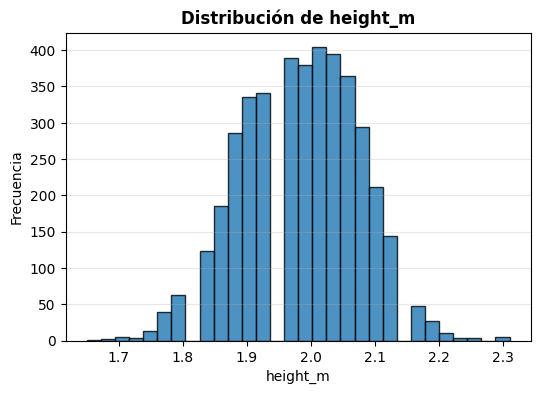

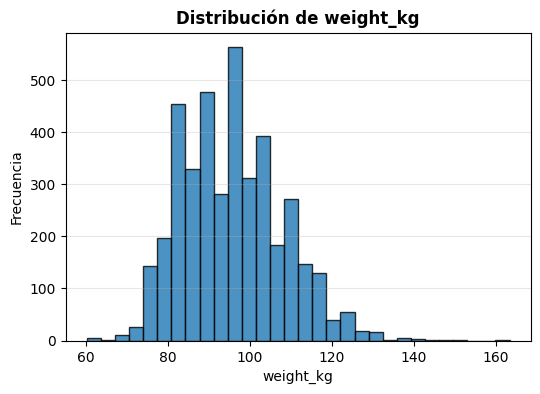

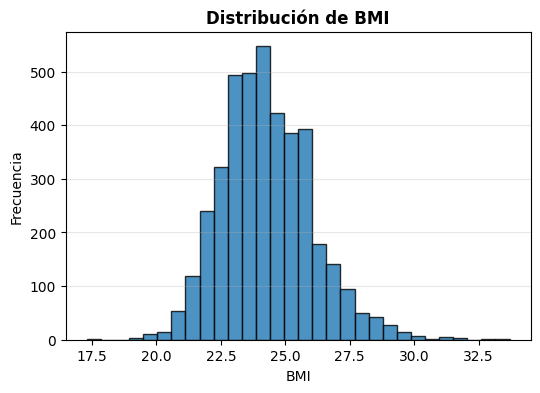

In [43]:
vars_anthro = ["height_m", "weight_kg", "BMI"]

for var in vars_anthro:
    plt.figure(figsize=(6,4))
    plt.hist(df_info[var].dropna(), bins=30, color=palette_corporate["main"], edgecolor="black", alpha=0.8)
    plt.title(f"Distribución de {var}", fontsize=12, fontweight="bold")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.grid(axis="y", alpha=0.3)
    plt.show()


Distribución de la altura (height_m)

La mayoría de los jugadores se concentra entre 1.95 y 2.05 m. Esto confirma que la NBA exige tallas superiores al promedio poblacional. Los valores más bajos (~1.75 m) son excepcionales y representan a bases muy puntuales. Los más altos (~2.25 m) son pivots de élite.

Distribución del peso (weight_kg)

El peso de los jugadores se concentra entre 85 y 115 kg, con una media cercana a 100 kg. Valores menores a 70 kg o superiores a 140 kg son muy poco frecuentes. La variabilidad refleja las diferencias entre posiciones: bases más livianos y pivots más pesados.

Distribución del IMC (BMI)

El IMC se concentra entre 22 y 26, lo que se considera rango saludable o apenas ligeramente elevado. Esto confirma que el IMC, usado en población general, no discrimina adecuadamente entre masa muscular y grasa en atletas de élite.

### Boxplots de variables antropométricas y de edad

Se representan los boxplots de `height_m`, `weight_kg`, `BMI`, `age`, `age_at_debut` y `age_at_last_season` para detectar valores atípicos y comparar la dispersión.


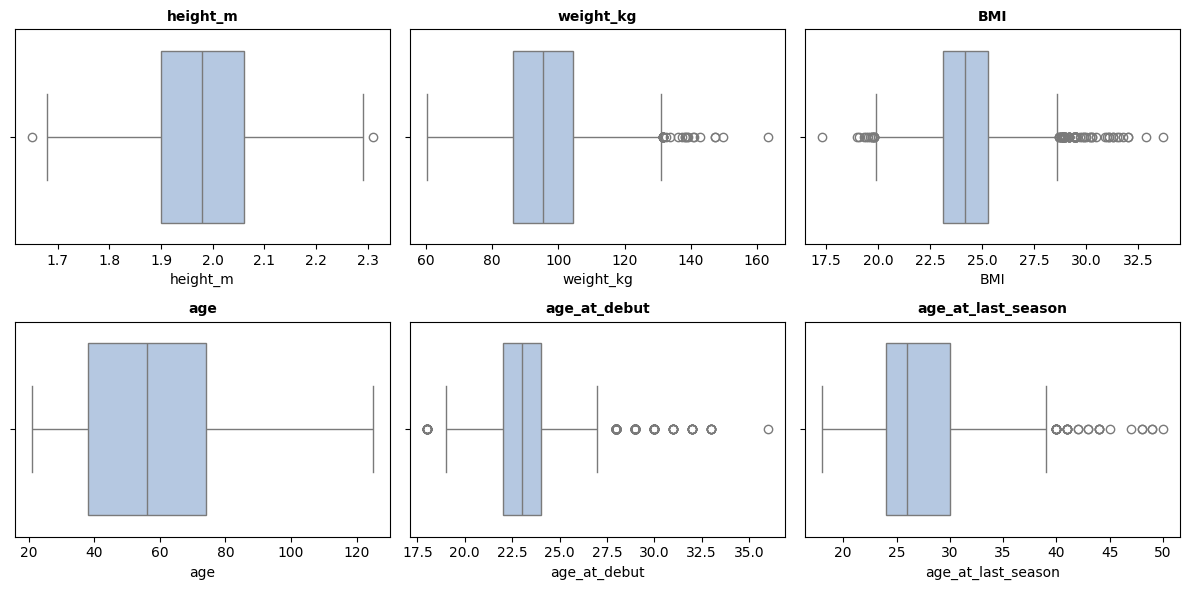

In [44]:
vars_num = ["height_m", "weight_kg", "BMI", "age", "age_at_debut", "age_at_last_season"]

plt.figure(figsize=(12,6))
for i, var in enumerate(vars_num, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_info[var], color=palette_corporate["secondary"])
    plt.title(var, fontsize=10, fontweight="bold")
plt.tight_layout()
plt.show()


Boxplots de variables físicas y de carrera

Los boxplots permiten identificar outliers en peso, IMC y edad de debut.

En peso e IMC, los valores extremos corresponden a pivots con físicos atípicos.

En edad al debut, la mayoría entra entre 19 y 24 años, aunque hay casos de >30 que son excepcionales.

En edad de retiro, el rango típico está entre 28 y 35 años.

### Evolución temporal de debut y retiro

Se grafican las series de tiempo de debut (`from_year`) y de última temporada (`to_year`) para identificar tendencias históricas en la NBA.


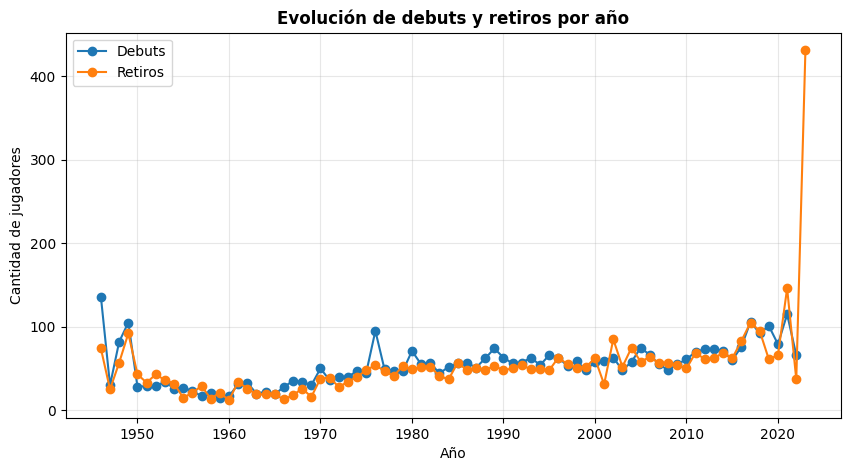

In [45]:
plt.figure(figsize=(10,5))
df_info["from_year"].dropna().astype(int).value_counts().sort_index().plot(
    kind="line", color=palette_corporate["main"], marker="o", label="Debuts"
)
df_info["to_year"].dropna().astype(int).value_counts().sort_index().plot(
    kind="line", color=palette_corporate["accent"], marker="o", label="Retiros"
)
plt.title("Evolución de debuts y retiros por año", fontsize=12, fontweight="bold")
plt.xlabel("Año")
plt.ylabel("Cantidad de jugadores")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Evolución de debuts y retiros por año

El análisis temporal muestra estabilidad relativa desde los años 70, con un aumento progresivo en las últimas décadas debido a la expansión de equipos y la internacionalización de la liga. En 2020-2021 se observa un pico que podría relacionarse con efectos post-pandemia en contratos y retiros.

### Relación entre altura, peso y BMI

Se representa la relación entre `height_m` y `weight_kg`. El color del punto corresponde al valor de `BMI`.


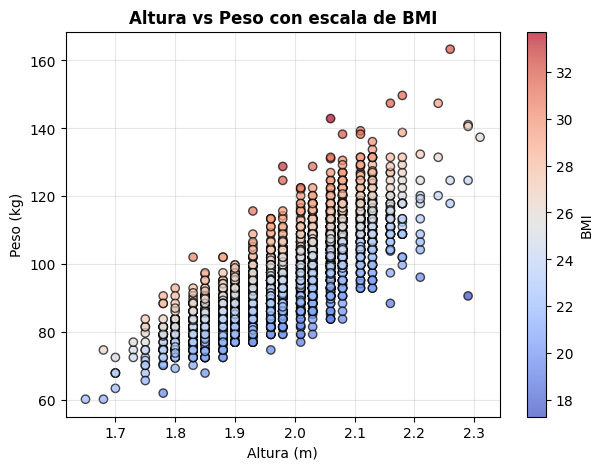

In [46]:
plt.figure(figsize=(7,5))
sc = plt.scatter(
    df_info["height_m"], df_info["weight_kg"],
    c=df_info["BMI"], cmap="coolwarm", alpha=0.7, edgecolor="k"
)
plt.colorbar(sc, label="BMI")
plt.title("Altura vs Peso con escala de BMI", fontsize=12, fontweight="bold")
plt.xlabel("Altura (m)")
plt.ylabel("Peso (kg)")
plt.grid(alpha=0.3)
plt.show()


Altura vs peso con escala de IMC

El gráfico confirma la relación lógica entre altura y peso: jugadores más altos pesan más. Sin embargo, el color del IMC muestra que no siempre los más altos tienen un IMC mayor; algunos bases más bajos pero pesados presentan IMC elevados, mientras que pivots muy altos se mantienen en rangos intermedios.

### Distribución de posiciones principales

Se grafican las frecuencias absolutas de cada posición principal (`main_position`) para entender la composición típica de los jugadores.


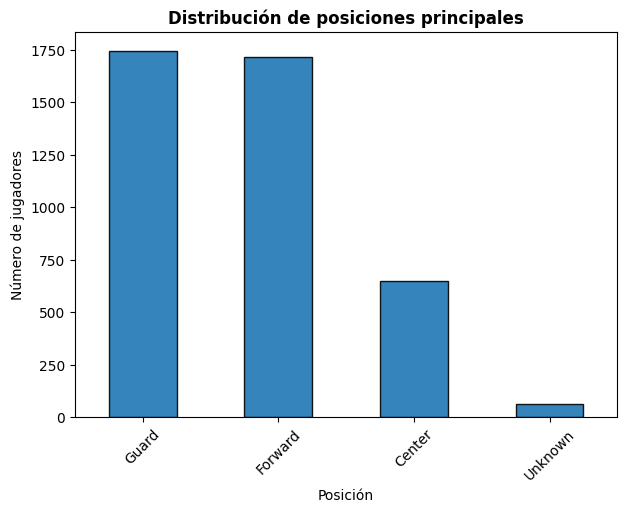

In [47]:
plt.figure(figsize=(7,5))
df_info["main_position"].value_counts().plot(
    kind="bar", color=palette_corporate["main"], edgecolor="black", alpha=0.9
)
plt.title("Distribución de posiciones principales", fontsize=12, fontweight="bold")
plt.xlabel("Posición")
plt.ylabel("Número de jugadores")
plt.xticks(rotation=45)
plt.show()


Distribución de posiciones principales

La mayor proporción corresponde a Guards (bases y escoltas), seguidos de Forwards (aleros) y, en menor medida, Centers. Esto refleja la evolución táctica de la NBA hacia posiciones más móviles y versátiles.

### Edad al debut según posición principal

Se grafican los boxplots de `age_at_debut` agrupados por `main_position` para identificar diferencias entre tipos de jugadores.


C:\Users\elian\AppData\Local\Temp\ipykernel_476\3426345950.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_info, x="main_position", y="age_at_debut", palette=[palette_corporate["main"], palette_corporate["secondary"], palette_corporate["accent"]])
C:\Users\elian\AppData\Local\Temp\ipykernel_476\3426345950.py:2: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df_info, x="main_position", y="age_at_debut", palette=[palette_corporate["main"], palette_corporate["secondary"], palette_corporate["accent"]])


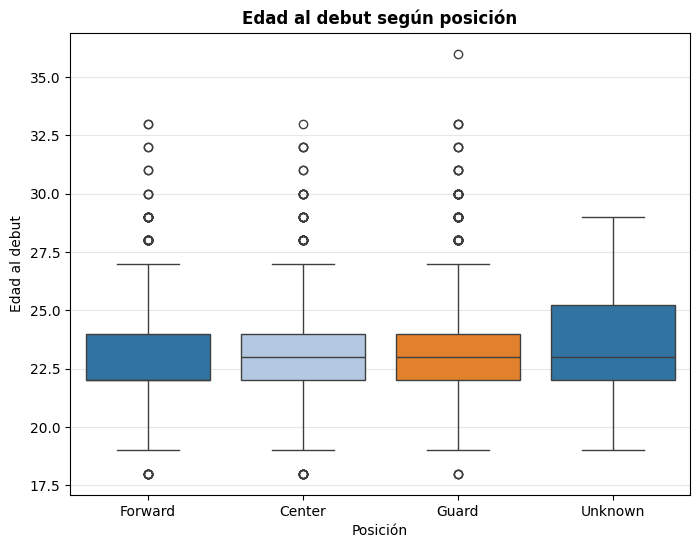

In [48]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_info, x="main_position", y="age_at_debut", palette=[palette_corporate["main"], palette_corporate["secondary"], palette_corporate["accent"]])
plt.title("Edad al debut según posición", fontsize=12, fontweight="bold")
plt.xlabel("Posición")
plt.ylabel("Edad al debut")
plt.grid(axis="y", alpha=0.3)
plt.show()


Edad al debut según posición

Los boxplots por posición muestran que no hay diferencias extremas, pero sí matices:

Guards suelen debutar antes (~22 años).

Forwards y Centers tienden a hacerlo levemente más tarde (~23 años).
Esto refleja que las posiciones interiores requieren mayor desarrollo físico para competir.

## Relación entre composición corporal y posición

En este análisis vamos a comparar el porcentaje de grasa estimado y la masa magra entre las diferentes posiciones principales (Guard, Forward, Center).  
El objetivo es observar si existen patrones claros según el rol en la cancha, por ejemplo si los pivots tienden a acumular más grasa o si los guards presentan menor masa magra en promedio.  


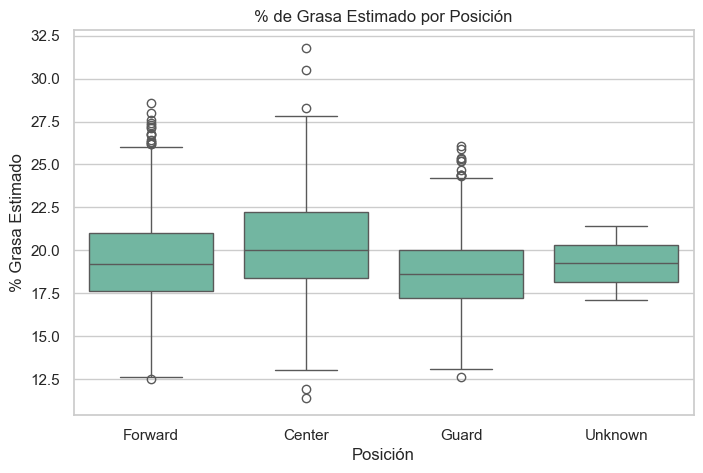

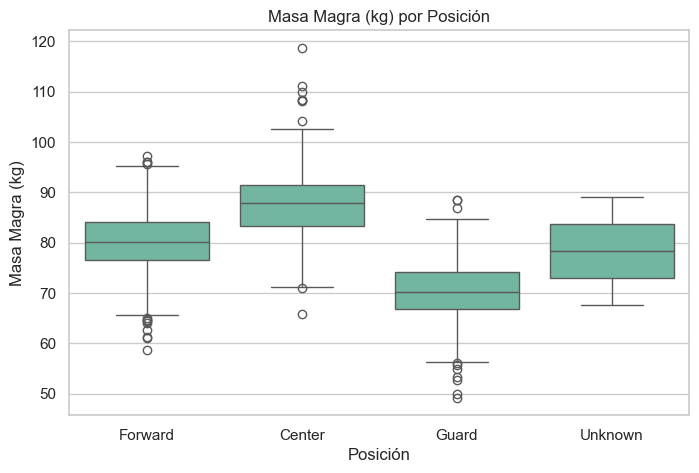

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo corporativo
sns.set(style="whitegrid", palette="Set2")

# Gráfico 1: % de grasa por posición
plt.figure(figsize=(8,5))
sns.boxplot(x="main_position", y="body_fat_pct_est", data=df_info)
plt.title("% de Grasa Estimado por Posición")
plt.xlabel("Posición")
plt.ylabel("% Grasa Estimado")
plt.show()

# Gráfico 2: Masa magra por posición
plt.figure(figsize=(8,5))
sns.boxplot(x="main_position", y="lean_mass_kg", data=df_info)
plt.title("Masa Magra (kg) por Posición")
plt.xlabel("Posición")
plt.ylabel("Masa Magra (kg)")
plt.show()


## Relación entre Composición Corporal y Posiciones

% de Grasa estimado por posición

Centers: valores más altos de grasa corporal.

Guards: menor % de grasa, asociados a velocidad y agilidad.

Forwards: intermedios, con mayor dispersión.

Unknown: similar a Guards y Forwards, pero con poca representatividad.

Masa magra por posición

Centers: mayor masa magra, coherente con necesidad de fuerza y tamaño.

Guards: menor masa magra, perfil físico más liviano.

Forwards: valores intermedios entre fuerza y velocidad.

Unknown: amplia dispersión, sin patrón definido.


La relación entre posición y composición corporal es consistente con lo que se espera a nivel fisiológico y táctico en el baloncesto profesional:

Centers = más masa magra + algo más de grasa.

Guards = menos masa magra + menos grasa.

Forwards = valores intermedios.

Esto valida la utilidad de haber estimado el % de grasa y desglosado la masa corporal en masa grasa y masa magra, ya que permite un análisis más profundo de las diferencias físicas según rol en cancha.

# Conclusión de la etapa de limpieza y análisis inicial

Tras la depuración y estandarización de `common_player_info`, el dataset quedó listo para integrarse con otras tablas clave del proyecto.

🔹 **Hallazgos principales**
- **Perfil físico promedio:** 2,0 m, 100 kg e IMC ~24 → composición atlética.  
- **Edad:** debut ~23 años, retiro 27–30 (con outliers esperables).  
- **Composición corporal:**  
  - *Centers*: más masa magra y % de grasa algo mayor.  
  - *Guards*: menos grasa y peso → mayor agilidad.  
  - *Forwards*: valores intermedios → rol mixto.  
- **Tendencias históricas:** debuts/retiros reflejan la evolución de la liga.

🔹 **Interpretación**
- El rendimiento depende de la relación masa magra / grasa más que del peso total.  
- Cada posición tiene un perfil corporal ideal para maximizar rendimiento.  

El dataset ya está limpio, normalizado y con métricas derivadas, listo para cruzarse con datos del Draft Combine y Performance en la siguiente fase.


In [52]:

df_info.to_csv(
    r"C:\Users\elian\OneDrive\Escritorio\NBA_ComposicionCorporal_Rendimiento\data_clean\common_player_info_ready.csv",
    index=False,
    encoding="utf-8"
)

print("Archivo guardado como common_player_info_ready.csv")



Archivo guardado como common_player_info_ready.csv


In [53]:
df_check = pd.read_csv(
    r"C:\Users\elian\OneDrive\Escritorio\NBA_ComposicionCorporal_Rendimiento\data_clean\common_player_info_ready.csv"
)

print("Shape:", df_check.shape)
df_check.head()


Shape: (4171, 37)


,person_id,birthdate,school,country,last_affiliation,season_exp,jersey,position,rosterstatus,games_played_current_season_flag,...,age_at_last_season,height_m,weight_kg,BMI,body_fat_pct_est,fat_mass_kg,lean_mass_kg,player_name_clean,all_positions,main_position
0,76001,1968-06-24,Duke,United States,Duke/USA,5.0,30,Forward,Inactive,NaN,...,26.0,2.08,108.9,25.2,20.0,21.8,87.1,Alaa Abdelnaby,['Forward'],Forward
1,76003,1947-04-16,UCLA,United States,UCLA/USA,20.0,33,Center,Inactive,NaN,...,41.0,2.18,102.1,21.5,19.0,19.4,82.7,Kareem Abdul Jabbar,['Center'],Center
2,1505,1974-11-03,San Jose State,France,San Jose State/France,7.0,9,Forward-Guard,Inactive,NaN,...,29.0,1.98,106.6,27.2,23.1,24.6,82.0,Tariq Abdul Wahad,"['Forward', 'Guard']",Forward
3,949,1976-12-11,California,United States,California/USA,13.0,3,Forward,Inactive,NaN,...,31.0,2.06,111.1,26.2,22.4,24.9,86.2,Shareef Abdur Rahim,['Forward'],Forward
4,76005,1954-05-06,Indiana,United States,Indiana/USA,5.0,5,Forward,Inactive,NaN,...,26.0,2.01,99.8,24.7,19.4,19.4,80.4,Tom Abernethy,['Forward'],Forward
